# Chapter 3: Probability and Distributions

## Learning Objective

- Many important tasks in analytics deal with uncertain events and it is essential to understand probability theory
- Learn what is a random variable 
- Learn different distributions and their applications in real world
- Learn how to derive insights from distribution parameters like mean, variance, probability distribution functions, confidernce interval etc.
- Learn how to formulate and do hypothesis tests like one sample t-test, two samples t-test, paired t-test, chi-square tests and ANOVA test.

### Random Variable

Random variable is a function that maps every outcome in the sample space to a real number e.g. age, salary, sales volume, gender (male or female) etc.

Random variables can be classified as discrete or continuous depending on the values it can take.

If the random variable has a finite or countably infinite set of values, then it is called a discrete random variable. Examples 

1. Customer churn [the random variables take binary values: (a) Churn and (b) Do not churn]. 
2. Fraud [the random variables take binary values: (a) Fraudulent transaction and (b) Genuine transaction].
3. Number of dependents. For example, the random variable can take any value 1/2/3/4 

A random variable has value from an infinite set of values is called a continuous random variable. Examples:

1. Market share of a company (which take any value from an infinite set of values between 0 and 100%). 
2. Percentage of attrition among employees of an organization. 
3. Time taken to complete an order placed at an e-commerce portal.

The possible values the random variable can take on and the associated probabilities is known as probability distribution. 

We will go through few probability distributions like binomial, poisson, exponential and normal distribution.

## Binomial Distribution

A random variable X is said to follow a Binomial distribution when the random variable can have only two outcomes success and failure (also known as Bernoulli trials). For example,

- Fraudulent insurance claims where the outcomes are: (a) Fraudulent claim and (b) Genuine claim. 
- Loan repayment default by a customer where the outcomes are: (a) Default and (b) No default. 

The objective is to find the probability of getting k successes out of n trials. 

- The probability of success is p and thus the probability of failure is (1 − p). 
- The probability p is constant and does not change between trials.

The probability that the number of success will be exactly x out of n trials (also known as Probability Mass Function (PMF) of the Binomial distribution) is given by

$ PMF(x) = \binom{n}{k} p^{x}(1 - p)^{n-x}$

### Example of Binomial Distribution

Fashion Trends Online (FTO) is an e-commerce company that sells women apparel. It is observed that  10% of their customers return the items purchased by them for many reasons (such as size, colour, and material mismatch). On a particular day, 20 customers purchased items from FTO. Calculate: 

**(a) Probability that exactly 5 customers will return the items.**

*stats.binom.pmf()* calculated PMF for binomial distribution and takes three parameters:
- expected number of successful trials (5)
- number of trials (20)
- The probability of success (0.1)

*scipy.stats.binom()* provides methods to work with binomial distribution.

In [1]:
from scipy import stats

stats.binom.pmf( 5, 20, 0.1 )

0.03192136111995428

To visualize how the PMF varies with increasing number of successful trials, we will create a list of all possible number of successes (0 to 20) and corresponding PMF values and draw a bar plot.

**(b) Probability that a maximum of 5 customers will return the items.**

*stats.binom.cdf()* computes the CDF for binomial distribution. In this case the cumulative distribution for all possible successful trials from 0 to 5.

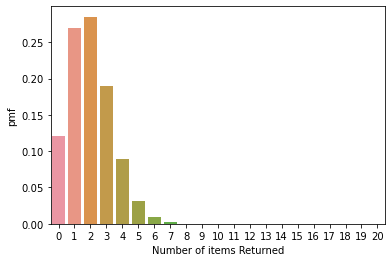

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
# range(0,21) returns all values from 0 to 20 (excluding 21)
pmf_df = pd.DataFrame( { 'success': range(0,21),
                         'pmf': list(stats.binom.pmf( range(0,21), 
                                                     20, 
                                                     0.1 ) ) } )

sn.barplot( x = pmf_df.success, y = pmf_df.pmf )
plt.ylabel('pmf')
plt.xlabel('Number of items Returned');

*Figure 3.6: Binomial Distribution*

In [3]:
stats.binom.cdf( 5, 20, 0.1 )

0.988746865835491

**(c) Probability that more than 5 customers will return the items purchased by them.**

This probability function can be computed by substracting CDF of 5 from 1.0, which is sum of all possible probabilities.

In [4]:
1 - stats.binom.cdf( 5, 20, 0.1 )

0.011253134164509015

**(d) Average number of customers who are likely to return the items and the variance and the standard deviation of the number of returns.**

- Average of a binomial distribution is given by $n*p$
- Variance of the binomial distribution is given by $n*p*(1-p)$

In [5]:
mean, var = stats.binom.stats(20, 0.1)
print( "Average: ", mean , " Variance:", var)

Average:  2.0  Variance: 1.8


## Poisson Distribution

We may have to calculate the probability of the number of events that may occur over a period of time or space. 
For example, 
- number of cancellation of orders by customers at an e-commerce portal in a day
- number of cash withdrawals at an ATM in an hour

When we have to find the probability of number of events, we use Poisson distribution. The probability mass function of a Poisson distribution is given by

$P(X=k) = \frac{e^{-\lambda} \space \lambda^{k}}{k!}$

where $\lambda$ is the rate of occurrence of the events per unit of measurement (in many situations the unit of measurement is likely to be time).

### Example of Poisson distribution

The number of calls arriving at a call center follows a Poisson distribution at 10 per hour. 

**(a) Calculate the probability that the number of calls will be maximum 5.**

In [6]:
stats.poisson.cdf(5, 10)

0.06708596287903189

**(b) Calculate the probability that the number of calls over a 3-hour period will exceed 30.**

Since the average calls per hour is 10 ($\lambda$ = 10), and we are interested in finding the calls over 3 hours, the mean number of calls over 3 hours is $\lambda t$ = 30. Probability that the number of calls will be more than 30 is given by

In [7]:
1 - stats.poisson.cdf(30, 30)

0.45164848742208863

## Exponential Distribution

Exponential distribution is a single parameter continuous distribution that is traditionally used for modeling time to failure of electronic components. 
The exponential distribution represents a process in which events occur continuously and independently at a constant average rate.

The probability density function is given by 

$P(x) = \lambda e^{-\lambda x}, x {\ge} 0$

Where,

- The parameter $\lambda$ is the scale parameter and represents the rate of occurrence of the event
- Mean of exponential distribution is given by $\frac{1}{\lambda}$

### Example of Exponential Distribution

The time to failure of an avionic system follows an exponential distribution with a mean time between failures (MTBF) of 1000 hours.  So, $\lambda$ is $\frac{1}{1000}$.

(a) Calculate the probability that the system will fail before 1000 hours. 

In [8]:
stats.expon.cdf(1000, 
                loc = 1/1000, 
                scale = 1000)

0.6321201909489326

(b) Calculate the probability that it will not fail up to 2000 hours. 

In [9]:
1 - stats.expon.cdf(2000, 
                loc = 1/1000, 
                scale = 1000)

0.13533541857196352

(c) Calculate the time by which 10% of the system will fail (that is, calculate  P10  life).

This can be calculated by ppf(percent point function) and is an inverse of cdf.

In [10]:
stats.expon.ppf(.1, 
                loc = 1/1000, 
                scale = 1000)

105.36151565782632

That is, by 105.36 hours, 10% of systems will fail.

## Normal Distribution

Normal distribution, also known as Gaussian distribution, is one of the most popular continuous distribution. Most variables follow normal distribution. It is also popularly known as bell curve.

To explore normal distribution in detail, we will use daily returns of stocks traded in BSE (Bombay Stock Exchange). Imagine a scenario, an investor wants to understand the risks and returns associated with various stocks before  investing in them. For example a decision to invest in two stocks: *BEML* and *GLAXO*. 

In [11]:
# Setting precision level to 4 to show only upto 4 decimal points
pd.option_context('display.precision', 2)

beml_df = pd.read_csv( 'BEML.csv' )
beml_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [12]:
glaxo_df = pd.read_csv( 'GLAXO.csv' )
glaxo_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


Our analysis will involve only daily close prices, so we will select *Date* and *Close* columns from the dataframes.

In [13]:
beml_df = beml_df[['Date', 'Close']]
glaxo_df = glaxo_df[['Date', 'Close']]

To order the rows by date and time, we can create a *DatetimeIndex* index from the column *Date* and it will ensure the rows are sorted by time in ascending order.

In [14]:
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']) )
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']) )

Let's display first 5 records after the dataframe is sorted by time to ensure that it done correctly.

In [15]:
glaxo_df.head(5)

,Date,Close
Date,,
2010-01-04,2010-01-04,1625.65
2010-01-05,2010-01-05,1616.80
2010-01-06,2010-01-06,1638.50
2010-01-07,2010-01-07,1648.70
2010-01-08,2010-01-08,1639.80


Now plot the trend of close prices of GLAXO stock using *plot()* method of matplotlib, which takes *glaxo_df.Close* as a parameter.

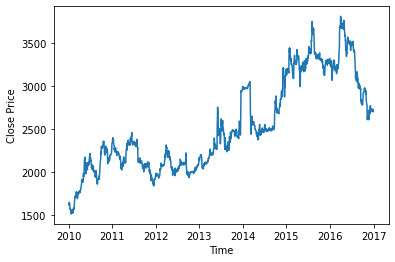

In [16]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

plt.plot( glaxo_df.Close );
plt.xlabel( 'Time' );
plt.ylabel( 'Close Price' );

*Figure 3.1: Close Price Trends of GLAXO Stock*

Now plotting BEML stock close price trend.

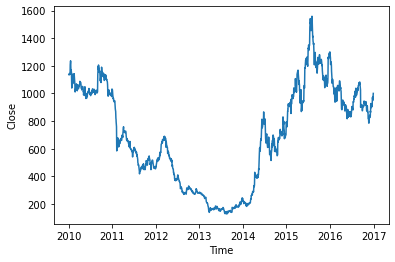

In [17]:
plt.plot( beml_df.Close );
plt.xlabel( 'Time' );
plt.ylabel( 'Close' );

*Figure 3.2: Close Price Trends of BEML Stock*

It can be observed that there is an upward trend in the close price of Glaxo during 2010-2017 period. But BEML had a downward trend during 2010-2013, followed by an upward trend since 2014 and then again a price correction from mid of 2015. 

What if I am a investor and interested in understanding the few characteristics about these stocks.

1. What is the expected daily rate of return of these two stocks?
2. Which stocks have higher risk or volatility as far as daily returns are concerned?
3. What is the expected range of return for 95% confidence interval? 
4. Which stock has higher probability of making a daily return of 2% or more?
5. Which stock has higher probability of making a loss (risk) of 2% or more?

To answer the above questions we must calculate daily gains on these stocks. The *gain* can be calculated as a percentage change in *close* price, from the previous day's *close* price. 

$gain = \frac{Close Price_{t} - Close Price_{t-1}}{Close Price_{t-1}}$

*pct_change()* in Pandas will give the percentage change in a column value shifted by a period, which is passed as a parameter to *periods*. *periods=1* indicate the value change since last row i.e. previous day.   

In [18]:
glaxo_df['gain'] = glaxo_df.Close.pct_change( periods = 1 )
beml_df['gain'] = beml_df.Close.pct_change( periods = 1 )
glaxo_df.head( 5 )

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1625.65,NaN
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398


The first day gain is shown as *NAN*, as there is no previous day for it to calculate *gain*. We can drop this record using *dropna()* method.

In [19]:
glaxo_df = glaxo_df.dropna()
beml_df = beml_df.dropna()

Now, plot *gain* against time.

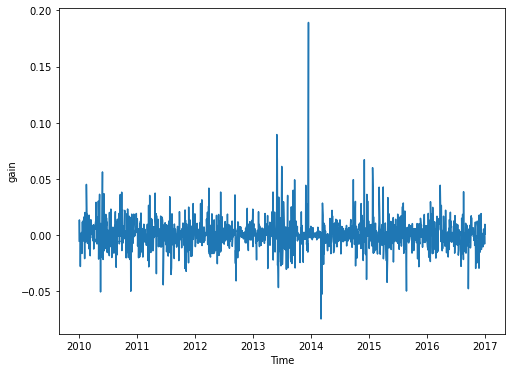

In [20]:
plt.figure( figsize = ( 8, 6 ));
plt.plot( glaxo_df.index, glaxo_df.gain  );
plt.xlabel( 'Time' );
plt.ylabel( 'gain' );

- The graph shows the daily gain is highly random and fluctuates around 0.00. 
- The gain remains mostly between 0.05 and -0.05. 
- But very high gains close to 0.20 has been observed once and similarly, 
- High loss of around 0.08 has been observed once.

We can draw distribution plot of *gain* of both *BEML* and *Glaxo* stocks to gain better insight.

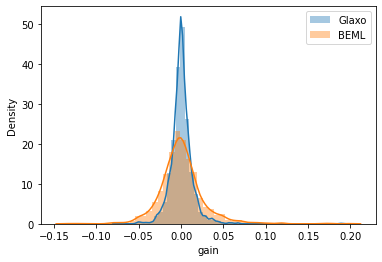

In [21]:
sn.distplot( glaxo_df.gain, label = 'Glaxo'  );
sn.distplot( beml_df.gain, label = 'BEML'  );
plt.xlabel( 'gain' );
plt.ylabel( 'Density' );
plt.legend();

*gain* seems to be normally distributed for both the stocks with mean around 0.00. BEML seems to have higher variance than Glaxo.


### Mean and Variance

The normal distribution is parameterized by two parameters: the mean of the distribution $\mu$ and the variance $\sigma^2$. 

The sample mean of a normal distribution is given by, 

$\bar x = \frac{1}{n}\sum_{i=1}^{n}x_{i}$

Variance is given by, 

$\sigma^2 = \frac{1}{n}\sqrt \sum_{i=1}^{n}(x_{i}-\bar x)^2$. 

And standard deviation is square root of variance and is denoted by $\sigma$.

Methods *mean()* and *std()* on dataframe columns return mean and standard deviation respectively.

In [52]:
print( "Daily gain of Glaxo")
print("---------------------")
print( "Mean: ", round(glaxo_df.gain.mean(), 4) )
print( "Standard Deviation: ", round(glaxo_df.gain.std(), 4) )

Daily gain of Glaxo
---------------------
Mean:  0.0004
Standard Deviation:  0.0134


In [53]:
print( "Daily gain of BEML")
print("---------------------")
print( "Mean: ", round(beml_df.gain.mean(), 4) )
print( "Standard Deviation: ", round(beml_df.gain.std(), 4) )

Daily gain of BEML
---------------------
Mean:  0.0003
Standard Deviation:  0.0264


- The expected daily rate of return (gain) is around 0% for both stocks. 

- Here variance or standard deviation of *gain* indicates risk. 
- BEML stock has higher risk as standard deviation of BEML is 2.64% whereas standard deviation for Glaxo is 1.33%.

### Confidence Interval

To find out what is the expected range of return for 95% confidence interval, we need to calculate the values *gain* for two standard deviation away from mean on both sides of the distribution i.e. $\mu \pm2\sigma$. 

In [25]:
from scipy import stats

glaxo_df_ci = stats.norm.interval(0.95,
                                  loc = glaxo_df.gain.mean(),
                                  scale = glaxo_df.gain.std())

print( "Gain at 95% confidence interval is:", np.round(glaxo_df_ci, 4) )

Gain at 95% confidence interval is: [-0.0258  0.0266]


In [26]:
beml_df_ci = stats.norm.interval( 0.95,
                loc=beml_df.gain.mean(),
                scale=beml_df.gain.std())

print( "Gain at 95% confidence interval is:", np.round(beml_df_ci, 4) )

Gain at 95% confidence interval is: [-0.0515  0.0521]


### Cumulative Probability Distribution

To understand the probability that the gain will be higher then 2% or more, we need to find out what is the sum of all probabilities that *gain* can take values more than 0.02 (i.e. 2%). 

<img src="cdf.png" width="300">

To know what is the probability the stocks gain will be more than -0.02 (i.e. loss), cummulative distribution function can be used to calculate the area of the distribution from left most point upto -0.02. *stats.norm.cdf()* returns cumulative distribution for a normal distribution.

In [27]:
print( "Probability of making 2% gain or higher in Glaxo: ")
stats.norm.cdf( -0.02,
             loc=glaxo_df.gain.mean(),
             scale=glaxo_df.gain.std())

Probability of making 2% gain or higher in Glaxo: 


0.06352488667177397

In [28]:
print( "Probability of making 2% gain or higher in BEML: ")
stats.norm.cdf( -0.02,
             loc=beml_df.gain.mean(),
             scale=beml_df.gain.std())

Probability of making 2% gain or higher in BEML: 


0.22155987503755292

Cumulative distribtion function value indicates that BEML has 22.1% probability, whereas Galxo has only 6.35% probability of making a loss of 2% or higher.

Similiarly, the probability of making a daily gain of 2% or higher will be give by the area to the right of 0.02 of the distribution. As *stats.norm.cdf()* give the cumulative area from left, the probability can be computed by subtracting the cumulative distribution function value from 1. Note that the sum of all probabilities is always 1.0.

In [29]:
print( "Probability of making 2% gain or higher in Glaxo: ", 
            1 - stats.norm.cdf( 0.02,
             loc=glaxo_df.gain.mean(),
             scale=glaxo_df.gain.std()) )

print( "Probability of making 2% gain or higher in BEML: ", 
            1 - stats.norm.cdf( 0.02,
             loc=beml_df.gain.mean(),
             scale=beml_df.gain.std()) )

Probability of making 2% gain or higher in Glaxo:  0.07104511457618568
Probability of making 2% gain or higher in BEML:  0.22769829484075343


The probability of making a *gain* of 2% or more for Galxo is 7.1%, where as 22.77% for BEML.

## Hypothesis Test

- The objective of hypothesis testing is to either reject or retain a *null hypothesis* (existing claim or belief) with th help of newly collected evidences or samples. 
- Hypothesis testing consists of two complementary statements called *null hypothesis* and *alternative hypothesis*. 
- *Null hypothesis* is existing claim or belief and *alternate hypothesis* is what we intend to establish with new evidences (samples).

**Some examples of *null hypothesis* are:**

- Children who drink the health drink Complan (a health drink owned by the company Heinz in India) are likely to grow taller.
- Women use camera phone more than men (Freier, 2016).
- Vegetarians miss few flights (Siegel, 2016).
- Smokers are better sales people.

**Typical steps of hypothesis testing are:**

- Hypothesis is described using a population parameter i.e. mean, standard deviation etc. 
    - $H_{0}$ is used to denote *null hypothesis* 
    - $H_{A}$ for *alternate hypothesis*.
- Identify the test statistic to be used for testing the hypothesis i.e. *z-test* or *t-test*
- Decide the significance value (called $\alpha$), which is criteria for rejection and retention of null hypothesis. Typical value used for $\alpha$ is 0.05.
- Find out the p-value (probability value), which is probability of observing the test statistic value when the null hypothesis is true.
- If the p-value is less than  $\alpha$, then null hopothesis is reject in favour of alternative hypothesis i.e. new belief. If If the p-value is more than  $\alpha$, then null hopothesis is retained i.e. existing belief contnues.


For all examples, we will use the following notations:

- $\mu$ - population mean
- $\sigma$ - population standard deviation
- $\bar{X}$ - sample mean
- $S$ - sample standard deviation
- $n$ - sample size

Let's take few examples and conduct hypothesis test.

### z-test

Z-test is used when:

- Testing the value of population mean, when population standard deviation is known. 

Z score is calculated as 

$Z = \frac{(\bar{X} - \mu)}{\frac{\sigma}{\sqrt{n}}}$

Fo example, A passport office claims that the passport applications are processed within 30 days of submitting the application form and all necessary documents. The file *passport.csv* contains processing time of 40 passport applicants. The population standard deviation of the processing time is 12.5 days. Conduct a hypothesis test at significance level $\alpha$ = 0.05 to verify the claim made by the passport office.

In [30]:
passport_df = pd.read_csv('passport.csv')

passport_df.head(5)

,processing_time
0,16.0
1,16.0
2,30.0
3,37.0
4,25.0


In [31]:
print(list(passport_df.processing_time))

[16.0, 16.0, 30.0, 37.0, 25.0, 22.0, 19.0, 35.0, 27.0, 32.0, 34.0, 28.0, 24.0, 35.0, 24.0, 21.0, 32.0, 29.0, 24.0, 35.0, 28.0, 29.0, 18.0, 31.0, 28.0, 33.0, 32.0, 24.0, 25.0, 22.0, 21.0, 27.0, 41.0, 23.0, 23.0, 16.0, 24.0, 38.0, 26.0, 28.0]


Let's first define the hypothesis

if $\mu$ is population mean i.e. mean processing time of passports

$H_{0}$: $\mu \ge$ 30

$H_{A}$: $\mu \lt$ 30

We will conduct a *z-test* for this hypothesis test. 

In [32]:
import math

def z_test( pop_mean, pop_var, sample ):  
    z_score = (sample.mean() - pop_mean)/(pop_var/math.sqrt(len(sample)))
    return z_score, stats.norm.cdf(z_score)

In [33]:
z_test( 30, 12.5, passport_df.processing_time )

(-1.4925950555994747, 0.06777160919961511)

The first value of the result is z score and second value is corresponding *p-value*. As the *p-value* is more than 0.05, the null hypothesis is retained. 

P-value provides us significance of sample evidence. In this example, we see there is 6.77% probability of observing a random sample at least as extreme as the observed sample. Since 6.77% is greater than significance value 5%, there is not enough evidence to reject null hypothesis. The null hypothesis is retained and it can be concluded that average processing time of passports is greater than equal to 30.

### One sample t-test

The t-test is used when the population standard deviation *S* is unknown and is estimated from the sample.

$t-statistics = \frac{(\bar{X} - \mu)}{\frac{S}{\sqrt{n}}}$


For example, Aravind Productions (AP) is a newly formed movie production house based out of Mumbai, India. AP was interested in understanding the production cost required for producing a Bollywood movie. The industry believes that the production house will require at least INR 500 million (50 crore) on average. It is assumed that the Bollywood movie production cost follows a normal distribution. Production cost of 40 Bollywood movies in millions of rupees are given in *bollywoodmovies.csv* file. Conduct an appropriate hypothesis test at $\alpha$ = 0.05 to check whether the belief about average production cost is correct.


In [34]:
bollywood_movies_df = pd.read_csv( 'bollywoodmovies.csv' )

In [35]:
bollywood_movies_df.head(5)

,production_cost
0,601
1,627
2,330
3,364
4,562


In [36]:
print(list(bollywood_movies_df.production_cost))

[601, 627, 330, 364, 562, 353, 583, 254, 528, 470, 125, 60, 101, 110, 60, 252, 281, 227, 484, 402, 408, 601, 593, 729, 402, 530, 708, 599, 439, 762, 292, 636, 444, 286, 636, 667, 252, 335, 457, 632]


$H_{0}$: $\mu =$ 500

$H_{A}$: $\mu \ne$ 500


*scipy.stats.ttest_1samp()* can be used to doing this test. It takes two parameters:

- a : array_like - sample observation
- popmean : float - expected value in null hypothesis.

In [37]:
stats.ttest_1samp( bollywood_movies_df.production_cost, 500 )

Ttest_1sampResult(statistic=-2.284553287266754, pvalue=0.0278625564067618)

This returns -2.2845 value for *t-statistics* and 0.0278 for *p-value*. This implies the sample mean is less than (to the left of) population mean and has only 2.7% probability of being part of the distribution with a population mean of 500. As *p-value* is less than 0.05, we can conclude that sample mean rejects that the production cost is at least 500.

### Two sample t-test

Two sample t-test is required to test difference between two population means, but standard deviations are unknown. The parameters are estimated by the samples.

For example, a company makes a claim that children (in the age group between 7 and 12) who drink their health drink will grow taller than the children who do not drink that health drink. Data in Table 6.10 shows average increase in height over one-year period from two groups: one drinking the health drink and the other not drinking the health drink. At $\alpha$ = 0.05, test whether the increase in height for the children who drink the health drink is different than those who do not drink health drink. 

The file *healthdrink.xlsx* contains the two tabs healthdrink_yes and healthdrink_no, which contains the respective samples.

In [38]:
healthdrink_yes_df = pd.read_excel( 'healthdrink.xlsx', 'healthdrink_yes')

In [39]:
healthdrink_yes_df.head(5)

,height_increase
0,8.6
1,5.8
2,10.2
3,8.5
4,6.8


In [40]:
healthdrink_yes_df.columns

Index(['height_increase'], dtype='object')

In [41]:
healthdrink_no_df = pd.read_excel( 'healthdrink.xlsx', 'healthdrink_no')
healthdrink_no_df.head(5)

,height_increase
0,5.3
1,9.0
2,5.7
3,5.5
4,5.4


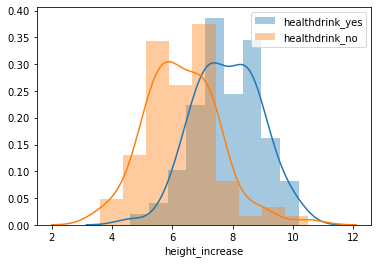

In [42]:
sn.distplot( healthdrink_yes_df['height_increase'], label ='healthdrink_yes' )
sn.distplot( healthdrink_no_df['height_increase'], label ='healthdrink_no' )
plt.legend();

*Figure 3.9: Comparing Distributions for health drink and no health drink*

We can observe from figure 3.9 that the distribution of increase in height for those who has health drink has shift to the right of those who did not have health drink. But is the difference 1.2 cm, as claimed, and statistically significant. 

*scipy.stats.ttest_ind()* takes two independent samples and returns the test statistics.

In [43]:
stats.ttest_ind(healthdrink_yes_df['height_increase'], 
                healthdrink_no_df['height_increase'])

Ttest_indResult(statistic=8.131675069083359, pvalue=1.197698592263946e-13)

The probability of the samples belonging to the same distribution is almost is equal to 0. This mean the increase in height for those who had health drink is significantly different than those who did not.

### Paired sample t-test

- Sometimes to analyze whether an intervention (or treatment) such as an event, a training programs, marketing promotions, treatment for specific illness. 

- The objective in this case is to check whether the difference in the parameter values is statistically significant before and after the intervention or between two different types of interventions. 

- This is called paired sample t-test and is used used for comparing two different interventions applied on the same samples.

Consider the following example for a paired t-test.

The file *breakups.csv* contains alcohol consumption before and after breakup. Conduct a paired t-test to check whether the alcohol consumption is more after the breakup at 95% confidence ($\alpha$ = 0.05).

In [44]:
breakups_df = pd.read_csv( 'breakups.csv' )
breakups_df.head(5)

,Before_Breakup,After_Breakup
0,470,408
1,354,439
2,496,321
3,351,437
4,349,335


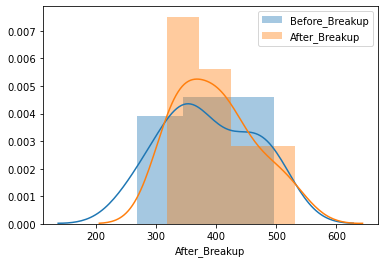

In [45]:
sn.distplot( breakups_df['Before_Breakup'], label ='Before_Breakup' )
sn.distplot( breakups_df['After_Breakup'], label ='After_Breakup' )
plt.legend();

*Figure 3.10: Comparing Distributions for drinking habits before and after breakups*

*scipy.stats.ttest_rel* is used to conduct this test. It takes both related samples as parameters.

In [46]:
stats.ttest_rel( breakups_df['Before_Breakup'], breakups_df['After_Breakup'] )

Ttest_relResult(statistic=-0.5375404241815105, pvalue=0.5971346738292477)

As the *p-value* is 0.597, which is more than 0.05 value, we conclude that they are part of same distribution. There is not change in alcohol consumption pattern before and after breakup.

### Chi-squre Test of Independence

Chi-Square tests are hypothesis tests that are used for comparing the observed distribution of data with expected distribution of the data to decide whether there is any statistically significant difference between the observed distribution and a theoretical distribution. Chi-Square statistics is given by,

$\chi^2 = \sum_{i=1}^{n}\frac{ (O_{i} - E_{i})^2 }{ E_{i} }$

Where, $O_{i}$ is observed frequency and $E_{i}$ is expected frequency of the $i^{th}$ category.

For example, Hanuman Airlines (HA) operated daily flights to several Indian cities. One of the problems HA faces is the food preferences by the passengers. Captain Cook, the operations manager of HA, believes that 35% of their passengers prefer vegetarian food, 40% prefer non-vegetarian food, 20% low calorie food, and 5% request for diabetic food. A sample of 500 passengers was chosen to analyze the food preferences and the observed frequencies are as below 

- Vegetarian: 190
- Non-vegetarian: 185
- Low Calorie: 90
- Diabetic: 35

Conduct a chi-square test to check whether Captain Cook’s belief is true at $\alpha$ = 0.05.

*scipy.stats.chisquare* is used for chi-square test and takes the following parameters.

- f_obs : array_like - Observed frequencies in each category.
- f_exp : array_like - Expected frequencies in each category. 

From the data we can create the following arrays.

In [47]:
## Observed frequencies
f_obs = [190, 185, 90, 35] 
## Expected frquencies from the percentages expected 
f_exp = [500*0.35, 500*0.4, 500*.2, 500*0.05]
print( f_exp )

[175.0, 200.0, 100.0, 25.0]


In [48]:
stats.chisquare( f_obs, f_exp )

Power_divergenceResult(statistic=7.410714285714286, pvalue=0.05989751420084909)

As the *p-value* is more than 0.05, we retain the null hypothesis (original claim) i.e. Captain Cook's belief is true.

## Analysis of Variance (ANOVA)

Sometimes it may be necessary to conduct a hypothesis test to compare mean values simultaneously for more than two groups (samples) created using a factor (or factors). For example, a marketer may like to understand the impact of three different discount values (such as 0%, 10%, and 20% discount) on the average sales.

ONE-WAY ANOVA (Analysis of Variance) can be used to study the impact of a single treatment (also known as factor) at different levels (thus forming different groups) on a continuous response variable (or outcome variable). 

Then the null and alternative hypotheses for one-way ANOVA for comparing 3 groups are given by 

$H_{0}: \mu_{1} = \mu_{2} = \mu_{3}$

$H_{A}:$ *Not all $\mu$ values are equal*

Where, $\mu_{1}, \mu_{2}, \mu_{3}$ are mean of each group.

Note that the alternative hypothesis, *not all $\mu$ values are equal*, implies that some of them could be equal.

### Example of One-Way ANOVA

Ms Rachael Khanna the brand manager of ENZO detergent powder at the ‘one stop’ retail was interested in understanding whether the price discounts has any impact on the sales quantity of ENZO. To test whether the price discounts had any impact, the quantity (in kilograms) of ENZO sold in a day with price discounts of 0% (no discount), 10% and 20% were given on randomly selected days are given.

Conduct a one-way ANOVA to check whether discount had any significant impact on the average sales quantity at $\alpha$ = 0.05.

<img src='anova.png' width=400>

In [54]:
onestop_df = pd.read_csv('onestop.csv')
onestop_df.head(5)

,discount_0,discount_10,discount_20
0,39,34,42
1,32,41,43
2,25,45,44
3,25,39,46
4,37,38,41


Let's visualize the distribution of group using distribution plot.

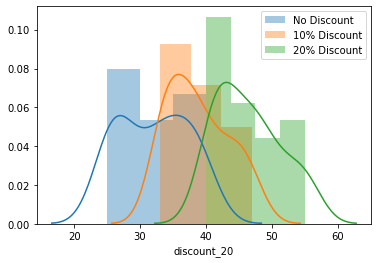

In [50]:
sn.distplot(onestop_df['discount_0'], label = 'No Discount')
sn.distplot(onestop_df['discount_10'], label = '10% Discount')
sn.distplot(onestop_df['discount_20'], label = '20% Discount')
plt.legend();

From the plot, it seems the distributions are not same. But it may be becuase of chance and only one-way anova test will ensure if they are same or not same. *scipy.stats.f_oneway()* method conducts one-way anova and returns F-statistics and p-value. If *p-value* is less than 0.05, the null hypothesis can be rejected and conclude that the mean of each groups are not same.

In [51]:
from scipy.stats import f_oneway

f_oneway( onestop_df['discount_0'],
          onestop_df['discount_10'],
          onestop_df['discount_20'])

F_onewayResult(statistic=65.86986401283694, pvalue=3.821500669725641e-18)

As p-value is less than 0.05, we reject the null hypothesis and conclude that the mean sales quantity values under different discounts are different.

## Conclusion:

- In this session we learnt the basic concepts of distributions, it's parameters and how they can be applied in real world to solve problems.
- Some of the distribution we explored are normal distribution, exponential distribution, binomial and poisson distribution and their applications.
- The objective of hypothesis testing is to either reject or retain an existing claim or belief with the help of newly collected evidences or samples. And explored various tests like z-test, t-test, chi-square test and anova test and scenarios in which the tests would be carried out.